<a href="https://colab.research.google.com/github/Ilham-0104/Machine_Learning_Data_Science/blob/main/Bag_11_Time_Series_Pandas_Ilham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from prophet import Prophet

In [ ]:
WMT = pd.read_csv("/content/WMT.csv")
WMT.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.036447,2508800
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.036309,972800
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.035895,1945600
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.035895,409600
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.035343,870400


Time Series Univariate : Hanya menggunakan data waktu untuk prediksi nilai kedepan, Hanya ada 2 kolom data : Kolom waktu dengan kolom nilai yang ingin diprediksi

Time Series Multicariate(Time Series with Exogenous Variables) : Metode Time e=series yang menggunakan variable pendukung lainnya jadi lebih dari satu kolom features

In [ ]:
# Tipe data untuk setiap kolom WMT
WMT.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Native vs Framework

native adalah bagian bawaan original dari sebuah bahasa pemograman

Framework adalah hasil modifikasi untuk mempermudah suatu task dari native

In [ ]:
WMT["Date"] = pd.to_datetime(WMT["Date"])
WMT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       12491 non-null  datetime64[ns]
 1   Open       12491 non-null  float64       
 2   High       12491 non-null  float64       
 3   Low        12491 non-null  float64       
 4   Close      12491 non-null  float64       
 5   Adj Close  12491 non-null  float64       
 6   Volume     12491 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 683.2 KB


In [ ]:
WMT.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [ ]:
WMT = WMT[["Date", "High"]]

In [ ]:
WMT.head()

,Date,High
0,1972-08-25,0.064697
1,1972-08-28,0.064941
2,1972-08-29,0.063965
3,1972-08-30,0.063477
4,1972-08-31,0.062988


Feature(Variable Independent)-> ds

Target (Variable Dependent) -> y

In [ ]:
WMT.columns = ["ds", "y"]
WMT.head()

,ds,y
0,1972-08-25,0.064697
1,1972-08-28,0.064941
2,1972-08-29,0.063965
3,1972-08-30,0.063477
4,1972-08-31,0.062988


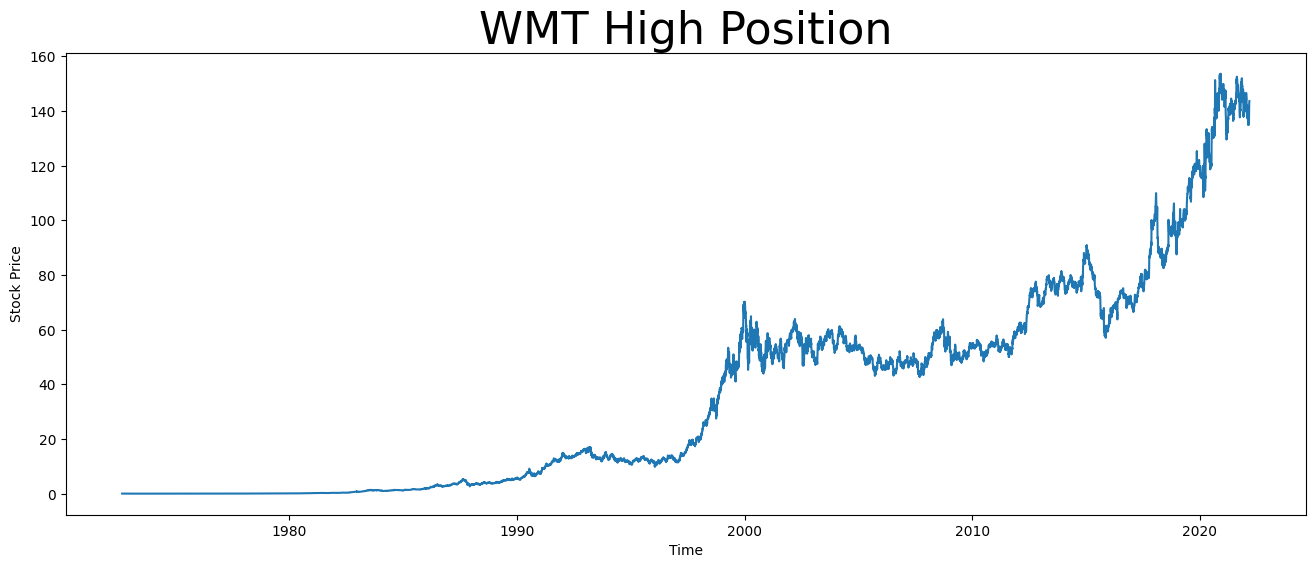

In [ ]:
plt.figure(figsize=(16, 6))
plt.plot(WMT["ds"], WMT["y"])

plt.title("WMT High Position", fontsize=32)
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.show()

In [ ]:
# Plotly for Dynamic Visualization
import plotly.express as px

fig = px.line(WMT, x="ds", y="y", title="Walmart High Price in Years")
fig.show()

Modelling

In [ ]:
Model = Prophet()
Model.fit(WMT)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfy251ljr/tkl5qi77.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfy251ljr/99xv0xtk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25211', 'data', 'file=/tmp/tmpfy251ljr/tkl5qi77.json', 'init=/tmp/tmpfy251ljr/99xv0xtk.json', 'output', 'file=/tmp/tmpfy251ljr/prophet_modelp8t1hg14/prophet_model-20240727061427.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:14:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:14:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Membuat data tanggal kosong untuk diforecast oleh Prophet

future = Model.make_future_dataframe(periods=365*10, freq="D")
forecast = Model.predict(future)

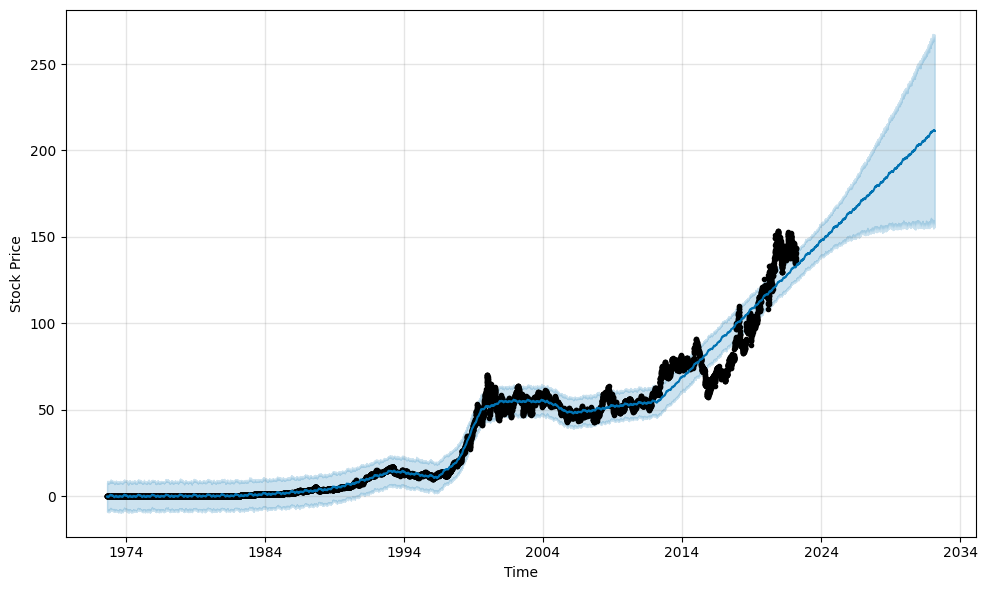

In [ ]:
Model.plot(forecast, xlabel= "Time", ylabel = "Stock Price")
plt.show()

# Model Perfomance Evaluation

In [ ]:
# Cross Validation
from prophet.diagnostics import cross_validation

df_cv = cross_validation(Model, initial = "1000 days",
                         period = "180 days",
                         horizon = "365 days")

INFO:prophet:Making 93 forecasts with cutoffs between 1975-11-04 00:00:00 and 2021-03-07 00:00:00


  0%|          | 0/93 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpfy251ljr/1trqwpot.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfy251ljr/dpiv5qkl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64047', 'data', 'file=/tmp/tmpfy251ljr/1trqwpot.json', 'init=/tmp/tmpfy251ljr/dpiv5qkl.json', 'output', 'file=/tmp/tmpfy251ljr/prophet_modelp4k30erv/prophet_model-20240727061450.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:14:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:14:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfy251ljr/30kkvwyh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpfy251ljr/kdn1egnr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
from prophet.diagnostics import performance_metrics

df_performance = performance_metrics(df_cv)
df_performance.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,71.215430,8.438924,5.251923,0.146346,0.123376,0.150866,0.224188
1,38 days,71.665660,8.465557,5.261876,0.146590,0.124598,0.151111,0.223949
2,39 days,71.984563,8.484372,5.276031,0.147002,0.125394,0.151411,0.223005
3,40 days,72.453808,8.511980,5.292155,0.147315,0.126077,0.151631,0.221714
4,41 days,73.519738,8.574365,5.323039,0.147913,0.126758,0.152323,0.218096


# Pandas Date Time Manipulation

In [ ]:
# Buat date range di pandas
data_range = pd.date_range(start="2024-07-27", periods=84, freq="D")
data_range[:20]

DatetimeIndex(['2024-07-27', '2024-07-28', '2024-07-29', '2024-07-30',
               '2024-07-31', '2024-08-01', '2024-08-02', '2024-08-03',
               '2024-08-04', '2024-08-05', '2024-08-06', '2024-08-07',
               '2024-08-08', '2024-08-09', '2024-08-10', '2024-08-11',
               '2024-08-12', '2024-08-13', '2024-08-14', '2024-08-15'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
data_range = pd.date_range(start="2024-07-07", end="2024-12-31")
data_range[10:]

DatetimeIndex(['2024-07-17', '2024-07-18', '2024-07-19', '2024-07-20',
               '2024-07-21', '2024-07-22', '2024-07-23', '2024-07-24',
               '2024-07-25', '2024-07-26',
               ...
               '2024-12-22', '2024-12-23', '2024-12-24', '2024-12-25',
               '2024-12-26', '2024-12-27', '2024-12-28', '2024-12-29',
               '2024-12-30', '2024-12-31'],
              dtype='datetime64[ns]', length=168, freq='D')

In [ ]:
data_range = pd.date_range(start="2024-07-07", periods = 30, freq ="H")
data_range[10:]

DatetimeIndex(['2024-07-07 10:00:00', '2024-07-07 11:00:00',
               '2024-07-07 12:00:00', '2024-07-07 13:00:00',
               '2024-07-07 14:00:00', '2024-07-07 15:00:00',
               '2024-07-07 16:00:00', '2024-07-07 17:00:00',
               '2024-07-07 18:00:00', '2024-07-07 19:00:00',
               '2024-07-07 20:00:00', '2024-07-07 21:00:00',
               '2024-07-07 22:00:00', '2024-07-07 23:00:00',
               '2024-07-08 00:00:00', '2024-07-08 01:00:00',
               '2024-07-08 02:00:00', '2024-07-08 03:00:00',
               '2024-07-08 04:00:00', '2024-07-08 05:00:00'],
              dtype='datetime64[ns]', freq='H')

In [ ]:
data_range = pd.date_range(start="2024-07-07", periods = 30, freq ="S")
data_range[10:]

DatetimeIndex(['2024-07-07 00:00:10', '2024-07-07 00:00:11',
               '2024-07-07 00:00:12', '2024-07-07 00:00:13',
               '2024-07-07 00:00:14', '2024-07-07 00:00:15',
               '2024-07-07 00:00:16', '2024-07-07 00:00:17',
               '2024-07-07 00:00:18', '2024-07-07 00:00:19',
               '2024-07-07 00:00:20', '2024-07-07 00:00:21',
               '2024-07-07 00:00:22', '2024-07-07 00:00:23',
               '2024-07-07 00:00:24', '2024-07-07 00:00:25',
               '2024-07-07 00:00:26', '2024-07-07 00:00:27',
               '2024-07-07 00:00:28', '2024-07-07 00:00:29'],
              dtype='datetime64[ns]', freq='S')

In [ ]:
!pip install pandas_datareader
import pandas_datareader.data as web # Khusus menarik data dari website

In [ ]:
def fetch_financial_data(company):
  return web.DataReader(name=company, data_source="stooq")

In [ ]:
nvidia = fetch_financial_data("NVDA")
nvidia

,Open,High,Low,Close,Volume
Date,,,,,
2024-07-26,116.19000,116.20000,111.58000,113.06000,2.933991e+08
2024-07-25,113.04000,116.63000,106.30000,112.28000,4.600670e+08
2024-07-24,119.17000,119.95000,113.44000,114.25000,3.277769e+08
2024-07-23,122.78000,124.69000,122.10000,122.59000,1.739110e+08
2024-07-22,120.35000,124.07000,119.86000,123.54000,2.580689e+08
...,...,...,...,...,...
2019-08-02,4.00667,4.07629,3.95922,4.00667,4.307866e+08
2019-08-01,4.20461,4.29511,4.04731,4.09955,4.236093e+08
2019-07-31,4.33005,4.33075,4.15170,4.19403,3.614608e+08


In [ ]:
nvidia.describe()
# Kapan harga NVDIA saat close terendah
# Kapan harga NVIDA saat harga tertinggi

,Open,High,Low,Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,27.704539,28.214264,27.154726,27.712846,4.544854e+08
std,26.931799,27.398889,26.347561,26.894520,1.862175e+08
min,3.726420,3.769370,3.664200,3.698260,9.810874e+07
25%,12.753650,12.951050,12.532050,12.686600,3.215007e+08
50%,17.920350,18.237500,17.653200,18.008750,4.278304e+08
75%,30.794550,31.283775,29.850000,30.507825,5.517120e+08
max,139.800000,140.760000,132.420000,135.580000,1.544406e+09


In [ ]:
# Close terendah
nvidia[nvidia["Close"] <= 3.7]

,Open,High,Low,Close,Volume
Date,,,,,
2019-08-15,3.75608,3.76937,3.6642,3.69826,5.576169e+08


In [ ]:
# Close terendah
nvidia[nvidia["Close"] >= 135.58]

,Open,High,Low,Close,Volume
Date,,,,,
2024-06-18,131.14,136.33,130.69,135.58,294335054.0
